In [66]:
import numpy as np
import matplotlib.pyplot as plt
zn_mod = np.array([0,1,5,10,20,50])


In [73]:
ze_mod = (zn_mod[1:] + zn_mod[:-1])/2

mod_value = np.exp(-ze_mod/5)

z_obs = np.arange(1,45)
obs_value = np.exp(-z_obs/5)*(1+np.random.normal(scale=0.1,size=len(z_obs))) + np.random.normal(scale=0.01,size=len(z_obs))

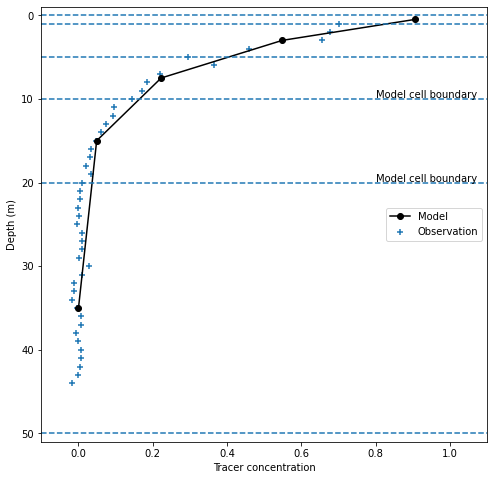

In [84]:
plt.figure(figsize=(8,8))
plt.plot(mod_value, ze_mod,'ko-', label='Model')
for z in zn_mod:
    plt.axhline(y=z, linestyle='--')
plt.ylim([51,-1])
plt.xlim(-0.1,1.1)
plt.scatter(obs_value, z_obs,marker='+',label='Observation')
plt.ylabel("Depth (m)")
plt.xlabel("Tracer concentration")
plt.annotate("Model cell boundary",xy=(0.8,19.9))
plt.annotate("Model cell boundary",xy=(0.8,9.9))
plt.legend()

In [85]:
np.digitize(z_obs, zn_mod)

array([2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int64)

In [86]:
zn_mod

array([ 0,  1,  5, 10, 20, 50])

In [89]:
from scipy import stats
res = stats.binned_statistic(z_obs,obs_value,bins=zn_mod)

In [106]:
res.statistic[-1]

0.0020456433901470455

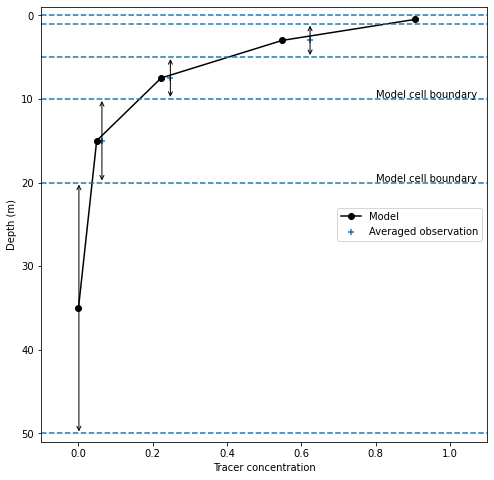

In [112]:
plt.figure(figsize=(8,8))
plt.plot(mod_value, ze_mod,'ko-', label='Model')
for z in zn_mod:
    plt.axhline(y=z, linestyle='--')
plt.ylim([51,-1])
plt.xlim(-0.1,1.1)
#plt.scatter(obs_value, z_obs,marker='+',label='Observation')
plt.ylabel("Depth (m)")
plt.xlabel("Tracer concentration")
plt.annotate("Model cell boundary",xy=(0.8,19.9))
plt.annotate("Model cell boundary",xy=(0.8,9.9))
plt.scatter(res.statistic,ze_mod, marker='+',label='Averaged observation')
plt.annotate('',xy=(res.statistic[-4],5.0), xytext=(res.statistic[-4],1.0),arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.annotate('',xy=(res.statistic[-3],10.0), xytext=(res.statistic[-3],5.0),arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.annotate('',xy=(res.statistic[-2],20.0), xytext=(res.statistic[-2],10.0),arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.annotate('',xy=(res.statistic[-1],50.0), xytext=(res.statistic[-1],20.0),arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.legend()
